In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)

### countplot - bar plot

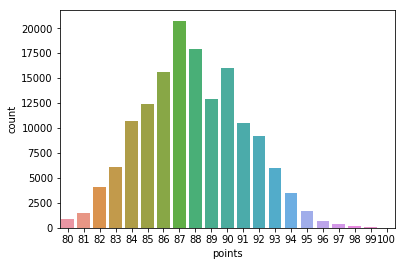

In [6]:
sns.countplot(reviews['points'])

### kde plot - comparing pandas plot

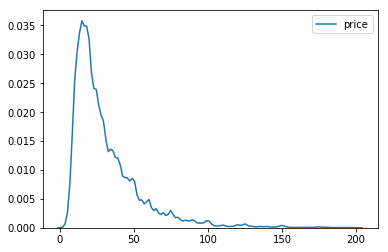

In [7]:
sns.kdeplot(reviews.query('price < 200').price)

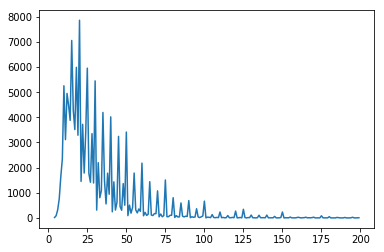

In [8]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

### kde plot - Bivariate

#### Question : Why different?

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


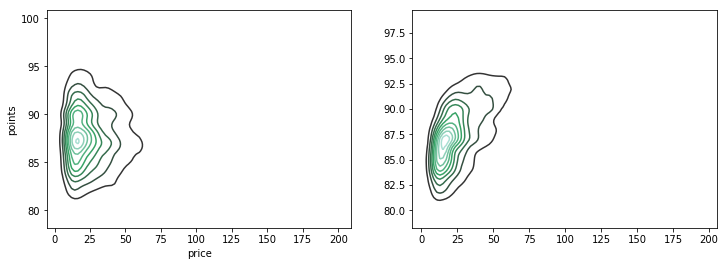

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, 'price'].dropna().sample(5000), 
            reviews[reviews['price'] < 200].loc[:, 'points'].dropna().sample(5000))

plt.subplot(122)
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

### Distplot

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


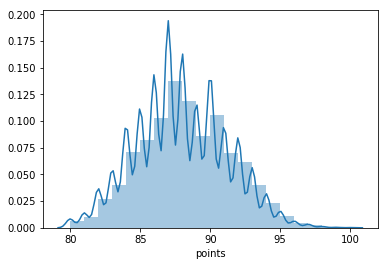

In [2]:
sns.distplot(reviews['points'], bins=20)

### jointplot

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


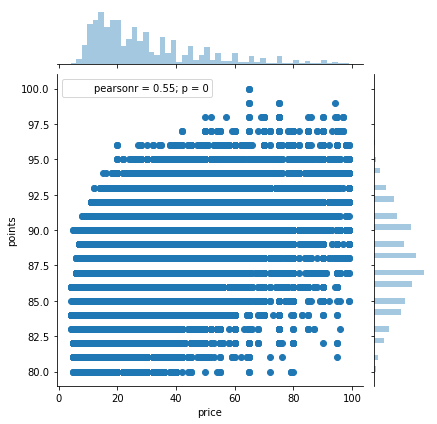

In [3]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


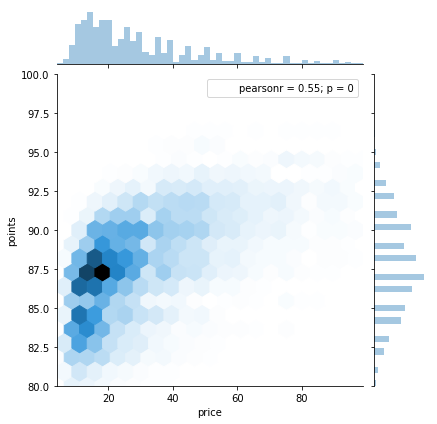

In [4]:
sns.jointplot(x='price', 
              y='points', 
              data=reviews[reviews['price'] < 100], 
              kind='hex', 
              gridsize=20)

### Boxplot and violin plot

### Choose the top 5 most varieties of reviews

In [49]:
reviews.variety.value_counts().head(5).index

Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')

In [50]:
reviews.variety

0            Cabernet Sauvignon
1                 Tinta de Toro
2               Sauvignon Blanc
3                    Pinot Noir
4            Provence red blend
5                 Tinta de Toro
6                 Tinta de Toro
7                 Tinta de Toro
8                    Pinot Noir
9                    Pinot Noir
10                     Friulano
11                   Pinot Noir
12                   Pinot Noir
13                       Tannat
14                   Pinot Noir
15                   Chardonnay
16           Cabernet Sauvignon
17                  Tempranillo
18                       Malbec
19                   Pinot Noir
20                         Rosé
21            Tempranillo Blend
22                Tinta de Toro
23                   Chardonnay
24                   Pinot Noir
25                   Chardonnay
26                   Pinot Noir
27                   Pinot Noir
28                   Pinot Noir
29                        Syrah
                  ...          
150900  

In [44]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
df

country                                        description  \
0                US  This tremendous 100% varietal wine hails from ...   
3                US  This spent 20 months in 30% new French oak, an...   
8                US  This re-named vineyard was formerly bottled as...   
9                US  The producer sources from two blocks of the vi...   
11               US  From 18-year-old vines, this supple well-balan...   
12               US  A standout even in this terrific lineup of 201...   
14               US  With its sophisticated mix of mineral, acid an...   
15               US  First made in 2006, this succulent luscious Ch...   
16               US  This blockbuster, powerhouse of a wine suggest...   
19               US  This fresh and lively medium-bodied wine is be...   
23               US  The apogee of this ambitious winery's white wi...   
24               US  San Jose-based producer Adam Comartin heads 1,...   
25      New Zealand  Yields were down in 2015, but intensity is up,...   
26               US  Bergström has made a Shea designate since 2003...   
27               US  Focused and dense, this intense wine captures ...   
28               US  Cranberry, baked rhubarb, anise and crushed sl...   
31               US  Steely and perfumed, this wine sees only 20% n...   
34               US  The aromas entice with notes of wet stone, hon...   
39            Italy  This bright, savory wine delivers aromas and f...   
43            Italy  Aromas of dark-skinned berry, rose and wild he...   
45            Italy  A blend of 90% Sangiovese and 10% Canaiolo, th...   
47               US  Blended with 9% Malbec, 9% Cabernet Franc and ...   
49               US  The aromas of blue fruit, herbs and spice are ...   
51           France  This structured, complex Chardonnay is packed ...   
53           France  With its light color and cool feel, this well-...   
54               US  There's a lot to like in this nicely priced wh...   
55               US  A blend of Cabernet from Grand Ciel (31%), Cie...   
59            Italy  This savory blend of 40% Merlot, 30% Cabernet ...   
61        Australia  Moorooduc's estate Pinot Noir is a solid value...   
63           France  L'Homme Mort is a northern extension of the Fo...   
...             ...                                                ...   
150867        Chile  With its nose offering toasty oak and leather ...   
150870        Chile  Offers varietally correct flavors of black cur...   
150871        Chile  This wine, like so many from the 1998 vintage ...   
150876        Chile  Everything is front-end in this Chardonnay. Th...   
150877        Chile  Juicy dark cherry and berry aromas with cedar ...   
150879           US  A heavy wine, atypical of the appellation, whi...   
150881        Chile  A run-of-the-mill Cabernet Sauvignon, it's all...   
150882        Chile  Red-berry fruit with a heavy dose of herb and ...   
150884           US  Here's a nice everyday drinking wine with some...   
150885        Chile  Orangey aromas wrapped in not very subtle oak ...   
150887        Chile  The pineapple and lemon aromas and flavors in ...   
150888        Chile  It's nice to see an ever-increasing number of ...   
150889           US  A bizarre style of wine. The aromas are Port-l...   
150890        Chile  Wearing a heavy mantle of rather green, not-to...   
150893        Chile  This light to medium weight Cabernet has the r...   
150896           US  Some raspberry fruit in the aroma, but things ...   
150897        Chile  With a vegetal note, some cocoa and berry on t...   
150898        Chile  A light and tart wine, with a bouquet of berry...   
150899        Chile  Basic Cabernet Sauvignon, with all its goods u...   
150900        Chile  Aromas of freshly cut lumber, complete with so...   
150902        Chile  This medium weight Chardonnay offered aromas o...   
150903        Chile  Very light berry and mint aromas open this aus...   
150904        Ch

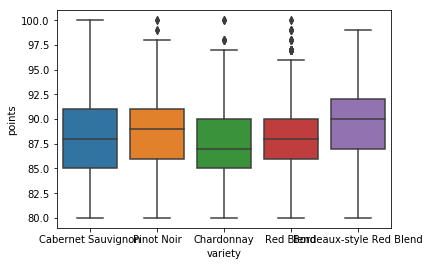

In [51]:
sns.boxplot(
    x='variety',
    y='points',
    data=df
)

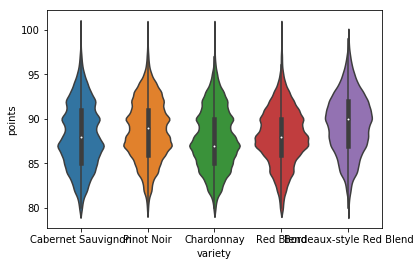

In [53]:
sns.violinplot(
    x='variety',
    y='points',
    data=df
)

### Exercise

In [57]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

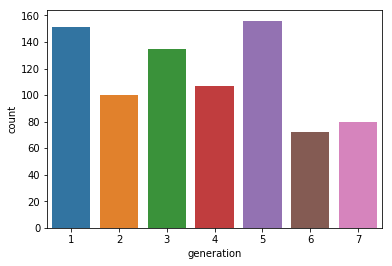

In [59]:
sns.countplot(pokemon['generation'])

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


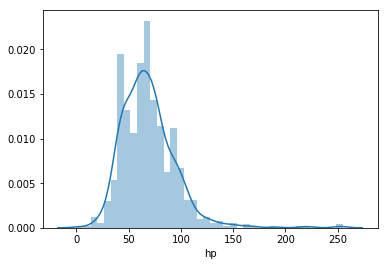

In [61]:
sns.distplot(pokemon['hp'])

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


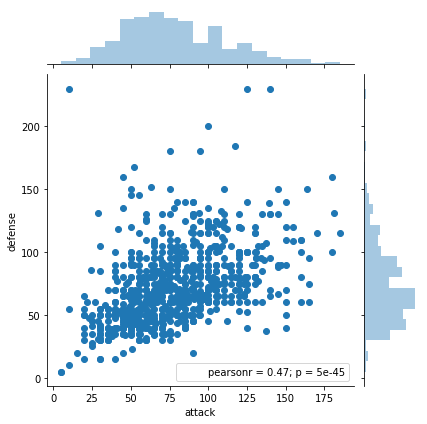

In [65]:
sns.jointplot(pokemon['attack'],pokemon['defense'])

C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\oubaituo-130\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


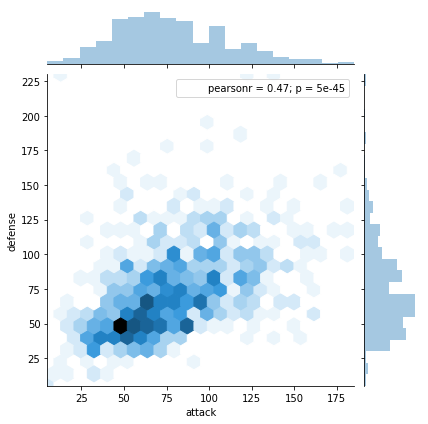

In [66]:
sns.jointplot(pokemon['attack'],pokemon['defense'],kind='hex')

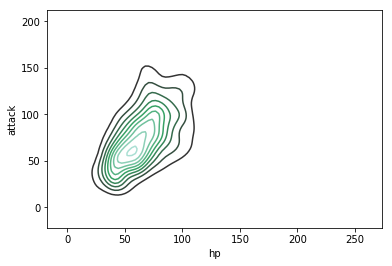

In [71]:
sns.kdeplot(pokemon['hp'],pokemon['attack'])

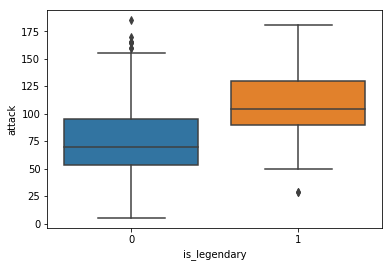

In [73]:
sns.boxplot(pokemon['is_legendary'],pokemon['attack'])

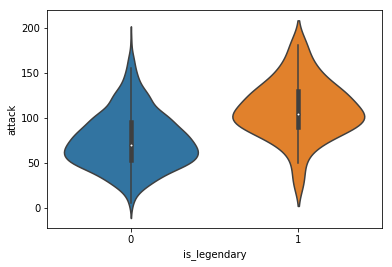

In [74]:
sns.violinplot(pokemon['is_legendary'],pokemon['attack'])